<a href="https://colab.research.google.com/github/glorynadda/spark/blob/main/STOCK_PRICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Stock Market Prediction using Numerical and Textual Analysis**

>


In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import re
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [23]:
df = pd.read_csv('spark.csv')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0


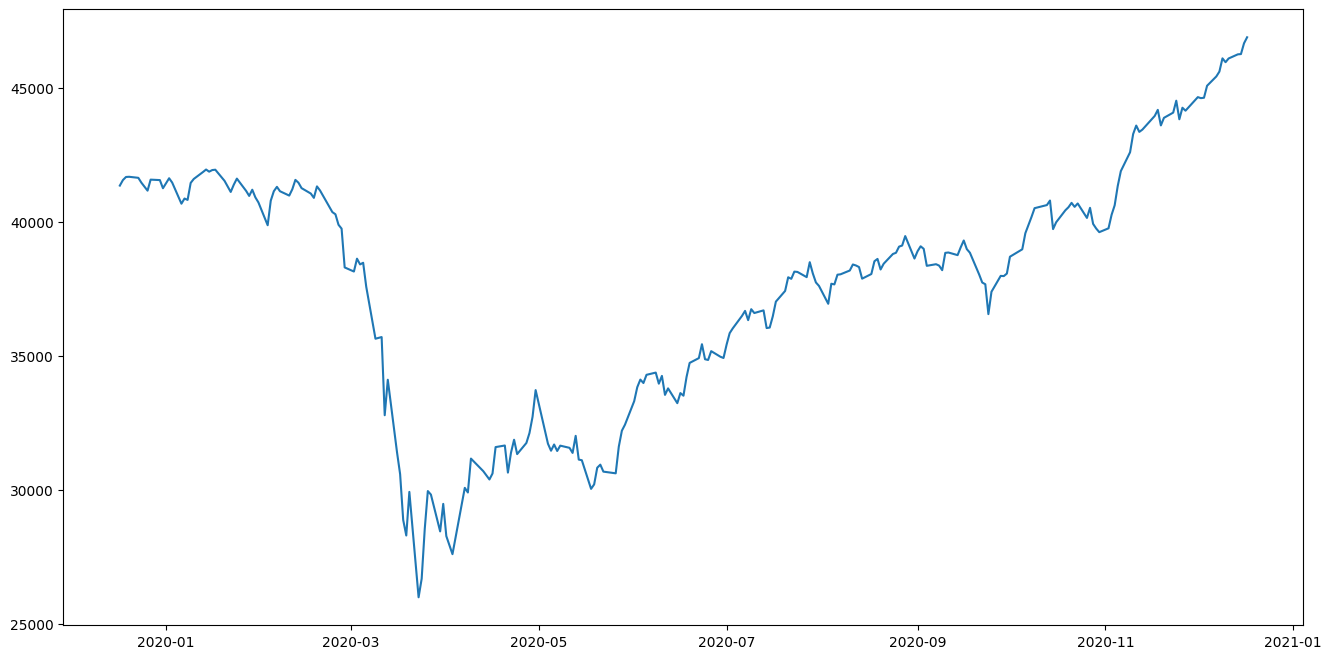

In [24]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
df.dropna(inplace=True)
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [25]:
np.random.seed(7)

In [26]:
def create_dataset(df2, look_back=1):
	dataX, dataY = [], []
	for i in range(len(df2)-look_back-1):
		a = df2[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(df2[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [27]:
df2 = pd.read_csv('spark.csv', usecols=[5], engine='python')
df2.dropna(inplace=True)
df2 = df2.values
df2 = df2.astype('float32')

In [28]:
scaler = MinMaxScaler(feature_range=(0, 1))
df2 = scaler.fit_transform(df2)

In [29]:
train_size = int(len(df2) * 0.67)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:], df2[train_size:len(df2),:]

In [30]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [31]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [32]:
model = Sequential()
model.add(LSTM(7, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
163/163 - 2s - loss: 0.0835 - 2s/epoch - 13ms/step
Epoch 2/100
163/163 - 0s - loss: 0.0137 - 442ms/epoch - 3ms/step
Epoch 3/100
163/163 - 0s - loss: 0.0085 - 427ms/epoch - 3ms/step
Epoch 4/100
163/163 - 0s - loss: 0.0049 - 453ms/epoch - 3ms/step
Epoch 5/100
163/163 - 0s - loss: 0.0028 - 444ms/epoch - 3ms/step
Epoch 6/100
163/163 - 0s - loss: 0.0021 - 450ms/epoch - 3ms/step
Epoch 7/100
163/163 - 0s - loss: 0.0020 - 473ms/epoch - 3ms/step
Epoch 8/100
163/163 - 0s - loss: 0.0019 - 412ms/epoch - 3ms/step
Epoch 9/100
163/163 - 0s - loss: 0.0019 - 297ms/epoch - 2ms/step
Epoch 10/100
163/163 - 0s - loss: 0.0019 - 301ms/epoch - 2ms/step
Epoch 11/100
163/163 - 0s - loss: 0.0019 - 308ms/epoch - 2ms/step
Epoch 12/100
163/163 - 0s - loss: 0.0019 - 311ms/epoch - 2ms/step
Epoch 13/100
163/163 - 0s - loss: 0.0019 - 299ms/epoch - 2ms/step
Epoch 14/100
163/163 - 0s - loss: 0.0020 - 329ms/epoch - 2ms/step
Epoch 15/100
163/163 - 0s - loss: 0.0019 - 328ms/epoch - 2ms/step
Epoch 16/100
163/163 

In [33]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

3/3 [==============================] - 0s 6ms/step


In [47]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

ValueError: Found array with dim 3. None expected <= 2.

In [35]:
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [36]:
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df2)-1, :] = testPredict

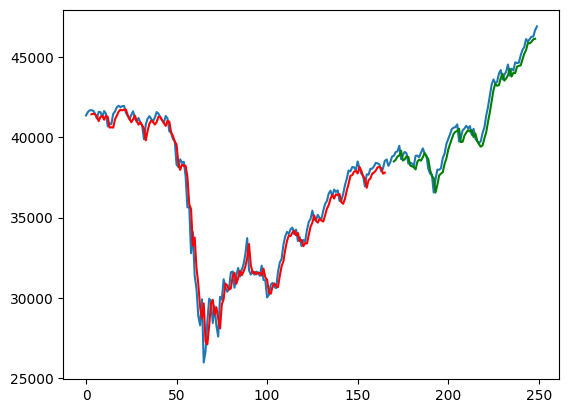

In [37]:
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

In [38]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Root mean square error = ",trainScore," RMSE")
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Root mean square error = ",testScore," RMSE")

Root mean square error =  750.3597226018994  RMSE
Root mean square error =  531.0733495187261  RMSE


In [ ]:
columns = ['Date','Category','News']
news = pd.read_csv('india-news-headlines.csv', names=columns, skiprows=[1484805])
news

In [48]:
news.drop(0, inplace=True)
news.drop('Category', axis = 1, inplace=True)
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484804 entries, 1 to 1484804
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Date    1484804 non-null  object
 1   News    1484804 non-null  object
dtypes: object(2)
memory usage: 22.7+ MB


In [49]:
news['Date'] = pd.to_datetime(news['Date'],format= '%Y %m %d')
news

,Date,News
1,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02 00:00:00.000000000,Fissures in Hurriyat over Pak visit
3,2001-01-02 00:00:00.000000000,America's unwanted heading for India?
4,2001-01-02 00:00:00.000000000,For bigwigs; it is destination Goa
5,2001-01-02 00:00:00.000000000,Extra buses to clear tourist traffic
...,...,...
1484800,1970-01-01 00:00:00.020121026,Espionage accused's brother promises to return...
1484801,1970-01-01 00:00:00.020121026,On asset front; sky is the limit
1484802,1970-01-01 00:00:00.020121026,Shreyas founder Leenaben passes away at 97
1484803,1970-01-01 00:00:00.020121026,Cops to identify habitual immigration offenders


In [50]:
news['News'] = news.groupby(['Date']).transform(lambda x : ' '.join(x))
news = news.drop_duplicates()
news.reset_index(inplace = True, drop = True)
news


,Date,News
0,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03 00:00:00.000000000,Powerless north India gropes in the dark Think...
2,2001-01-04 00:00:00.000000000,The string that pulled Stephen Hawking to Indi...
3,2001-01-05 00:00:00.000000000,Light combat craft takes India into club class...
4,2001-01-06 00:00:00.000000000,Light combat craft takes India into club class...
...,...,...
4270,1970-01-01 00:00:00.020121022,An integral outlook reveals secrets An integra...
4271,1970-01-01 00:00:00.020121023,Vrat food with a fresh twist Lanka politics th...
4272,1970-01-01 00:00:00.020121024,Bal Hanuman's unique bond with Maa Durga Nalla...
4273,1970-01-01 00:00:00.020121025,When Kajols sari flew Filmmaker Satyajit Ray's...


In [51]:
news['News']

0       Status quo will not be disturbed at Ayodhya; s...
1       Powerless north India gropes in the dark Think...
2       The string that pulled Stephen Hawking to Indi...
3       Light combat craft takes India into club class...
4       Light combat craft takes India into club class...
                              ...                        
4270    An integral outlook reveals secrets An integra...
4271    Vrat food with a fresh twist Lanka politics th...
4272    Bal Hanuman's unique bond with Maa Durga Nalla...
4273    When Kajols sari flew Filmmaker Satyajit Ray's...
4274    America Votes 2012 Photo Gallery (Champions Le...
Name: News, Length: 4275, dtype: object

In [52]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [53]:
news['Subjectivity'] = news['News'].apply(getSubjectivity)
news['Polarity'] = news['News'].apply(getPolarity)
news

<ipython-input-53-3cc292e574b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['Subjectivity'] = news['News'].apply(getSubjectivity)
<ipython-input-53-3cc292e574b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['Polarity'] = news['News'].apply(getPolarity)


,Date,News,Subjectivity,Polarity
0,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333
1,2001-01-03 00:00:00.000000000,Powerless north India gropes in the dark Think...,0.407692,0.088462
2,2001-01-04 00:00:00.000000000,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961
3,2001-01-05 00:00:00.000000000,Light combat craft takes India into club class...,0.476612,0.262024
4,2001-01-06 00:00:00.000000000,Light combat craft takes India into club class...,0.439394,0.248485
...,...,...,...,...
4270,1970-01-01 00:00:00.020121022,An integral outlook reveals secrets An integra...,0.378719,0.052787
4271,1970-01-01 00:00:00.020121023,Vrat food with a fresh twist Lanka politics th...,0.402180,0.036930
4272,1970-01-01 00:00:00.020121024,Bal Hanuman's unique bond with Maa Durga Nalla...,0.415816,0.081467
4273,1970-01-01 00:00:00.020121025,When Kajols sari flew Filmmaker Satyajit Ray's...,0.421828,0.078103


<Axes: >

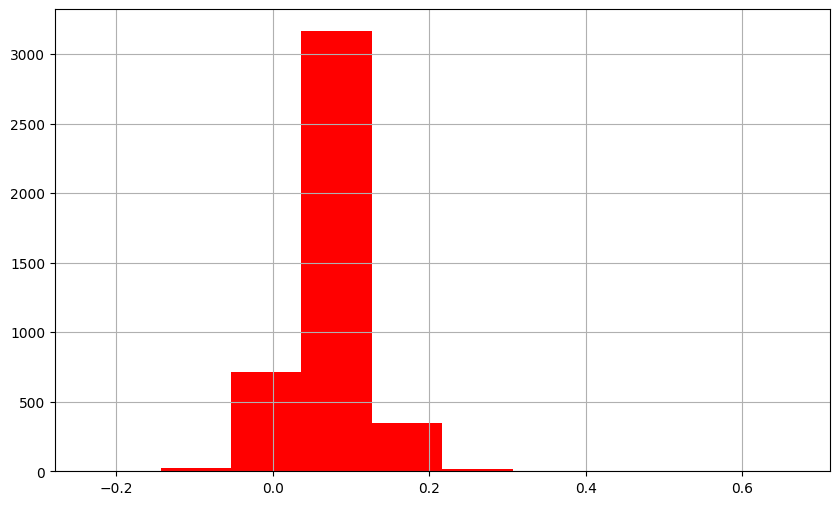

In [54]:
plt.figure(figsize = (10,6))
news['Polarity'].hist(color = 'red')

<Axes: >

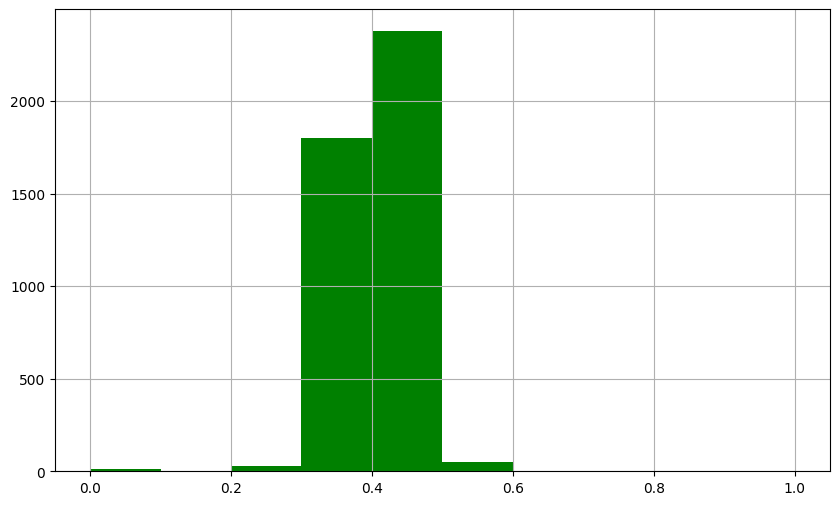

In [56]:
plt.figure(figsize = (10,6))
news['Subjectivity'].hist(color = 'green')

In [58]:
sia = SentimentIntensityAnalyzer()

news['Compound'] = [sia.polarity_scores(v)['compound'] for v in news['News']]
news['Negative'] = [sia.polarity_scores(v)['neg'] for v in news['News']]
news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in news['News']]
news['Positive'] = [sia.polarity_scores(v)['pos'] for v in news['News']]
news

<ipython-input-58-87012ddd2a27>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['Compound'] = [sia.polarity_scores(v)['compound'] for v in news['News']]
<ipython-input-58-87012ddd2a27>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['Negative'] = [sia.polarity_scores(v)['neg'] for v in news['News']]
<ipython-input-58-87012ddd2a27>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,2001-01-03 00:00:00.000000000,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,2001-01-04 00:00:00.000000000,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,2001-01-05 00:00:00.000000000,Light combat craft takes India into club class...,0.476612,0.262024,0.9769,0.124,0.719,0.157
4,2001-01-06 00:00:00.000000000,Light combat craft takes India into club class...,0.439394,0.248485,-0.4215,0.152,0.704,0.143
...,...,...,...,...,...,...,...,...
4270,1970-01-01 00:00:00.020121022,An integral outlook reveals secrets An integra...,0.378719,0.052787,-0.9997,0.136,0.763,0.100
4271,1970-01-01 00:00:00.020121023,Vrat food with a fresh twist Lanka politics th...,0.402180,0.036930,-0.9901,0.132,0.741,0.126
4272,1970-01-01 00:00:00.020121024,Bal Hanuman's unique bond with Maa Durga Nalla...,0.415816,0.081467,-0.9994,0.143,0.739,0.117
4273,1970-01-01 00:00:00.020121025,When Kajols sari flew Filmmaker Satyajit Ray's...,0.421828,0.078103,-0.9987,0.135,0.748,0.117


In [ ]:
merge = news
merge

In [ ]:
dff = merge[['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
dff

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(dff))
new_df.columns = dff.columns
new_df.index = dff.index
new_df.head()

In [ ]:
X = new_df[0:249]
y =df['Close']
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape

In [ ]:
x_train[:10]

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [ ]:
print(prediction[:10])
print(y_test[:10])
print("Root mean square error = ",math.sqrt(mean_squared_error(prediction,y_test))," RMSE")

In [ ]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
predictions = adb.predict(x_test)
print("Root mean square error = ",math.sqrt(mean_squared_error(predictions, y_test))," RMSE")